In [2]:
import numpy as np
from qiskit.opflow import (
    Z,
    X,
    Y,
    I,
    Plus,
    Minus,
    Zero, One,
    CX, S, H, T, CZ, Swap,
    TensoredOp
)
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator, Pauli
I0 = (I + Z) / 2
I1 = (I - Z) / 2

# Shift Operator

One important circuit is the one that does the transformation |i> -> |i+1> in the computation basis, aka the shif operator

In [10]:
from typing import Optional, List, Union, Dict, Sequence
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.parameterexpression import ParameterValueType
from qiskit.circuit.register import Register
from qiskit.circuit.bit import Bit
from qiskit.quantum_info.operators import Operator
import numpy as np


class ShiftOperator(QuantumCircuit):

    def __init__(
        self,
        regs: Union[Register, int, Sequence[Bit]],
        name: Optional[str] = None,
        global_phase: ParameterValueType = 0,
        metadata: Optional[Dict] = None,
        use_mct_ancilla: bool = False
    ):

        self.qreg = QuantumRegister(regs)
        super().__init__(self.qreg)
        

        if not use_mct_ancilla:
            for i in reversed(range(1, self.num_qubits)):
                self.mct(self.qreg[:i], self.qreg[i])
            self.x(self.qreg[0])
        else:
            qreg_shift_ancilla = QuantumRegister(self.num_qubits-3, 'q_shift_ancilla')
            self.add_register(qreg_shift_ancilla)
            for i in reversed(range(1, self.num_qubits)):
                self.mct(self.qreg[:i], self.qreg[i], qreg_shift_ancilla, mode='v-chain')
            self.x(self.qreg[0])
            
s = ShiftOperator(4)
Padj = Operator(s).adjoint()
P = Operator(s)

Pmat = Operator(P).data.real
Padjmat = Operator(Padj).data.real

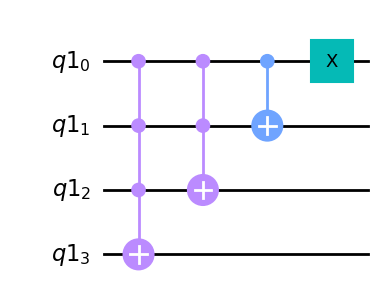

In [11]:
s.draw('mpl')

# Matrix to decompose

When considering a linear array where only the nearest neighbor interactions are inculded, the matrix of the linear system is:

In [5]:
import numpy as np
A0 = np.array([
       [ 896., -960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   64.],
       [-960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0., -960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0., -960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0., -960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0., -960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0., -960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0., -960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0., -960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -960., 1920., -960.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -960., 1920., -960.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -960., 1920., -960.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -960., 1920., -960.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -960., 1920., -960.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -960., 1920., -960.],
       [  64.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -960.,  896.]])


This matrix can be decomposed using unitaries/permuation matrix as:

In [8]:
a = 1920*np.eye(16) - 960*(np.eye(16,k=1)+np.eye(16,k=-1))

I = np.eye(16)
b = np.eye(16)
b[0,0] = b[-1,-1] = -1

c = np.eye(16)
c[0,0] = c[-1,-1] = 0 
c[0,-1] = c[-1,0] = -1

A0 - (a  - 960/2*I + (960/2+64)*b - c * 64)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

The matrix $a$ can be written as :

In [12]:
960*(I + np.abs(c) + (I-b)/2 - Pmat - Padjmat)

array([[1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [-960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0., -960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0., -960., 1920., -960.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0., -960., 1920., -960.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0., -960., 1920., -960.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0., -960., 1920., -960.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0., -960., 1920., -960.,
           0.,    0.,    0

Leading to 

In [13]:
960 * (I - Pmat - Padjmat + np.abs(c)) + 64 * b - 64*c 

array([[ 896., -960.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   64.],
       [-960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0., -960., 1920., -960.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0., -960., 1920., -960.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0., -960., 1920., -960.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0., -960., 1920., -960.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0., -960., 1920., -960.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0., -960., 1920., -960.,
           0.,    0.,    0

# Quantum circuit for $b$
The matrix $b$ is given by: 

In [14]:
b

array([[-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

In [18]:
from qiskit.circuit.library import MCMT, ZGate
mcz = MCMT(ZGate(),3,1)

This matrix can be encoded in the following circuit

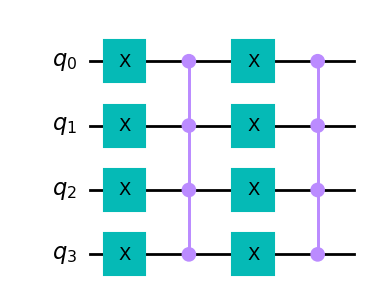

In [23]:
qc_b = QuantumCircuit(4)
qc_b.x(0)
qc_b.x(1)
qc_b.x(2)
qc_b.x(3)
qc_b.compose(mcz, inplace=True)
qc_b.x(0)
qc_b.x(1)
qc_b.x(2)
qc_b.x(3)
qc_b.compose(mcz, inplace=True)
qc_b.draw('mpl')


In [24]:
Operator(qc_b).data.real

array([[-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

# Quantum circuit for $c$
The matrix $c$ is given by 

In [25]:
c

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

This matrix can be encoded in the following circuit

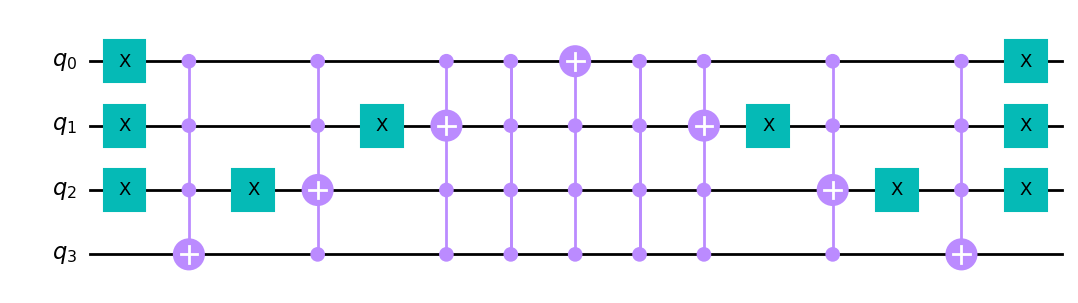

In [29]:
qc_c = QuantumCircuit(4)
qc_c.x(0)
qc_c.x(1)
qc_c.x(2)
qc_c.mcx([0,1,2],3)
qc_c.x(2)
# qc_c.x(1)
# qc_c.x(0)

# qc_c.x(0)
# qc_c.x(1)
qc_c.mcx([0,1,3],2)
qc_c.x(1)
# qc_c.x(0)

# qc_c.x(0)
qc_c.mcx([0,2,3],1)
# qc_c.x(0)

qc_c.compose(mcz,inplace=True)
qc_c.mcx([1,2,3],0)
qc_c.compose(mcz,inplace=True)

# qc_c.x(0)
qc_c.mcx([0,2,3],1)
# qc_c.x(0)

# qc_c.x(0)
qc_c.x(1)
qc_c.mcx([0,1,3],2)
# qc_c.x(1)
# qc_c.x(0)

# qc_c.x(0)
# qc_c.x(1)
qc_c.x(2)
qc_c.mcx([0,1,2],3)
qc_c.x(2)
qc_c.x(1)
qc_c.x(0)


qc_c.draw('mpl')


In [30]:
Operator(qc_c).data.real

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

# Quantum circuit for $|c|$
The matrix $|c|$ is given by: 

In [31]:
np.abs(c)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

This matrix can be encoded in the follwoing circuit:

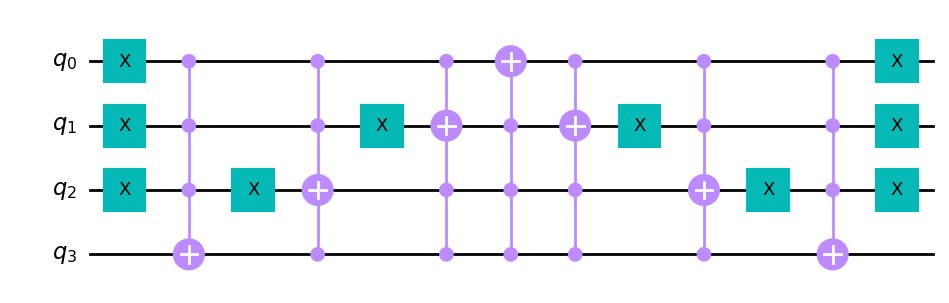

In [32]:
qc_absc = QuantumCircuit(4)
qc_absc.x(0)
qc_absc.x(1)
qc_absc.x(2)
qc_absc.mcx([0,1,2],3)
qc_absc.x(2)
# qc_absc.x(1)
# qc_absc.x(0)

# qc_absc.x(0)
# qc_absc.x(1)
qc_absc.mcx([0,1,3],2)
qc_absc.x(1)
# qc_absc.x(0)

# qc_absc.x(0)
qc_absc.mcx([0,2,3],1)
# qc_absc.x(0)


qc_absc.mcx([1,2,3],0)


# qc_absc.x(0)
qc_absc.mcx([0,2,3],1)
# qc_absc.x(0)

# qc_absc.x(0)
qc_absc.x(1)
qc_absc.mcx([0,1,3],2)
# qc_absc.x(1)
# qc_absc.x(0)

# qc_absc.x(0)
# qc_absc.x(1)
qc_absc.x(2)
qc_absc.mcx([0,1,2],3)
qc_absc.x(2)
qc_absc.x(1)
qc_absc.x(0)


qc_absc.draw('mpl')


In [33]:
Operator(qc_absc).data.real

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,